### Question: 2

Train an SVM regressor on : Bengaluru housing dataset

    Must include in details:

  - EDA

  - Feature engineering 



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
len(data)

13320

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
## Check duplicate values in the data
data.duplicated().sum()

529

In [8]:
## size of the data
data.shape

(13320, 9)

In [9]:
## remove the duplicate rows 
data.drop_duplicates(inplace=True) 

In [11]:
## Check duplicate values in the data
data.duplicated().sum()

0

In [12]:
categorical_columns= data.columns[data.dtypes == "object"]

In [13]:
numerical_columns= data.columns[data.dtypes != "object"]

In [14]:
data[categorical_columns].describe()

,area_type,availability,location,size,society,total_sqft
count,12791,12791,12790,12775,7463,12791
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8317,10172,523,4931,68,808


In [15]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
bath,12718.0,2.708602,1.357764,1.0,2.0,2.0,3.0,40.0
balcony,12186.0,1.582308,0.822536,0.0,1.0,2.0,2.0,3.0
price,12791.0,114.317646,151.480310,8.0,50.0,73.0,121.0,3600.0


In [17]:
### categorical column
categorical_columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [18]:
data[categorical_columns]['area_type'].value_counts()

area_type
Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: count, dtype: int64

In [19]:
data[categorical_columns]['availability'].value_counts()

availability
Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
16-Jul               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [20]:
data[categorical_columns]['location'].value_counts()

location
Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [21]:
data[categorical_columns]['size'].value_counts()

size
2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [22]:
data[categorical_columns]['society'].value_counts()

society
GrrvaGr    68
PrarePa    63
Sryalan    56
Prtates    54
GMown E    52
           ..
AcisePa     1
Madener     1
Siilka      1
Tepleee     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [23]:
data[categorical_columns]['total_sqft'].value_counts()

total_sqft
1200           808
1100           210
1500           202
2400           196
600            178
              ... 
2563 - 2733      1
2005             1
605 - 624        1
4260 - 4408      1
4689             1
Name: count, Length: 2117, dtype: int64

In [26]:
## society column has missing values 5328 missing values so we can drop this due to high no of missing 
# values filling these values is very difficult task as it is a categorical column and 
# filling with max count will create wrong data:
print(data[categorical_columns]['society'].isnull().sum())
data.drop(["society"],axis=1, inplace=True)

5328


In [59]:
## Total_square feet should be a numerical column but due to values like 2563 - 2733  its become categorical
## to handle this we will take the mean of these values
def get_mean(x):
    regex_for_num = r'\d{1,4}'

    matches = re.findall(regex_for_num, x)
    sum= 0
    for area in matches:
        sum+=int(area)
    if sum > 0 : 
        return int(sum/len(matches))

data["total_sqft"] = data["total_sqft"].apply(get_mean)

In [71]:
### in the size column we can extract the number only we do no require the bhk or bedrooms tag as number will have alll info we require
def get_bedrooms(x):
    # print(x)
    if type(x) == float:
        return x
    regex_for_num = r'\d{1,2}'

    matches = re.findall(regex_for_num, x)
    if len(matches) > 0 :
        return int(matches[0])
    return np.null
data["size"] = data["size"].apply(get_bedrooms)

In [72]:
data

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3.0,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5.0,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4.0,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1141,2.0,1.0,60.00


In [73]:
categorical_columns= data.columns[data.dtypes == "object"]

In [74]:
numerical_columns= data.columns[data.dtypes != "object"]

In [75]:
numerical_columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

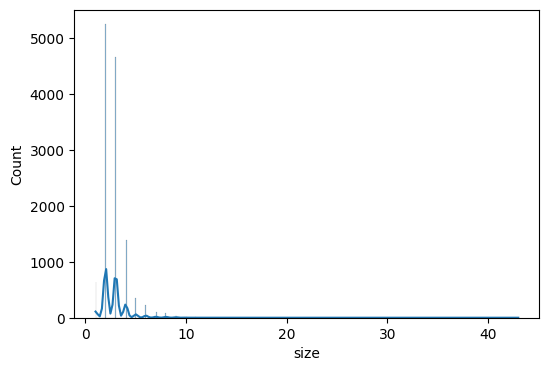

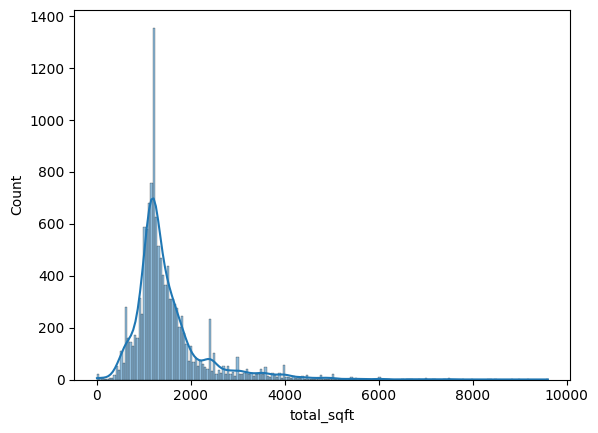

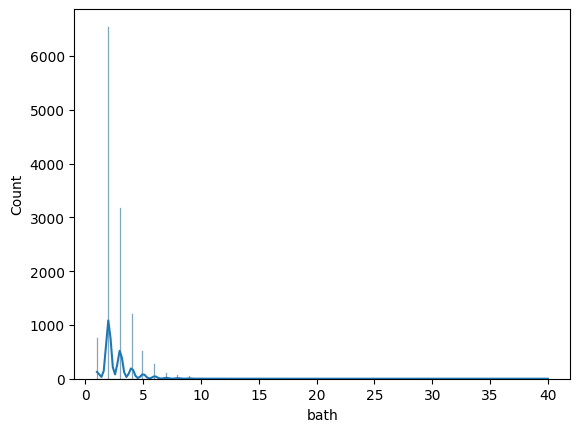

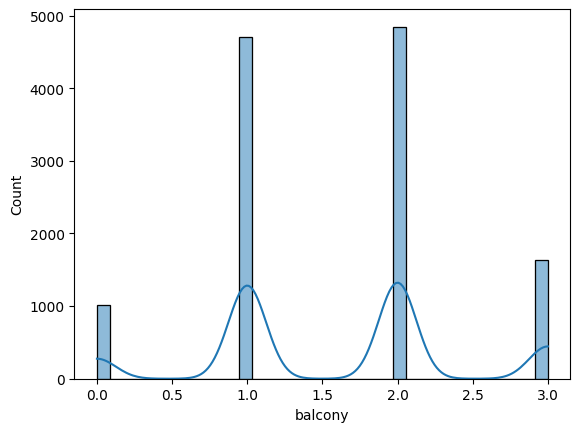

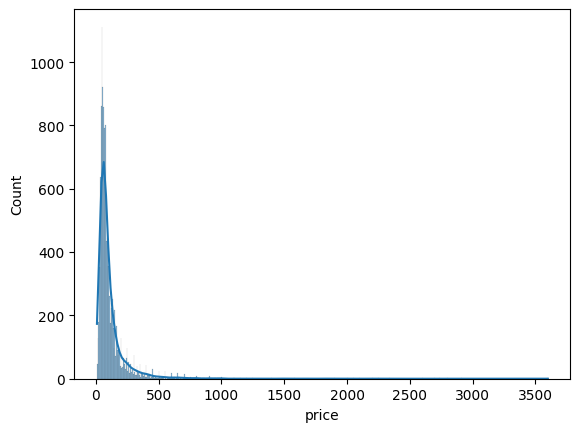

In [77]:
import seaborn as sns
plt.figure(figsize=(6,4))

for col in numerical_columns:
    sns.histplot(data = data, x=col, kde=True)
    print()
    plt.show()

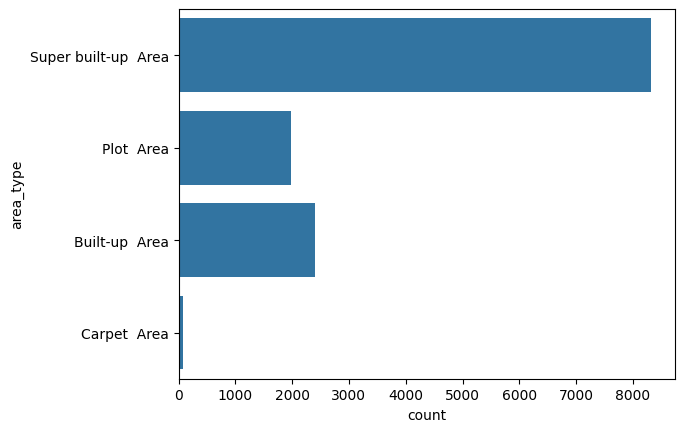

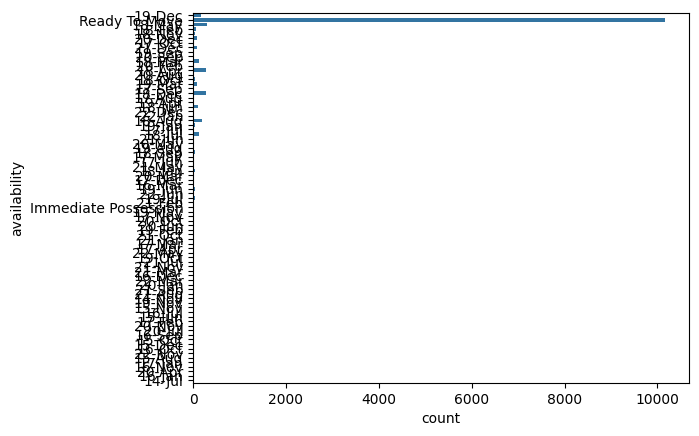

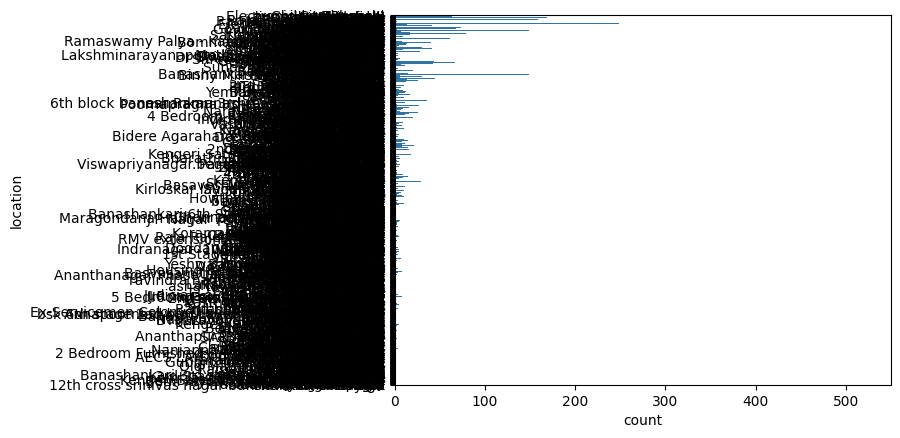

In [78]:
for  c in categorical_columns:
    sns.countplot(data[categorical_columns][c])
    plt.show()

<Axes: >

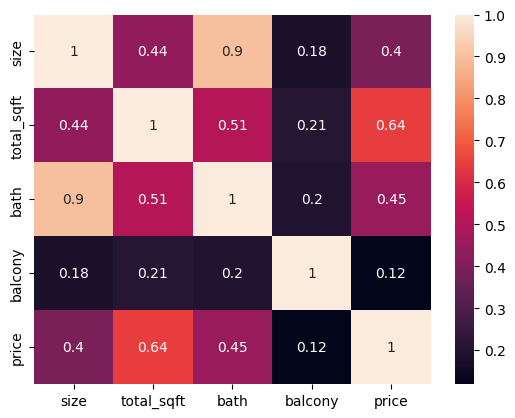

In [80]:
sns.heatmap(data[numerical_columns].corr(), annot=True)

In [102]:
data['availability'] = data['availability'].apply(lambda x: 1 if x=='Ready To Move' else 0)

In [115]:
data

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,1,Green Glen Layout,3.0,1715,3.0,3.0,112.00
13315,Built-up Area,1,Whitefield,5.0,3453,4.0,0.0,231.00
13316,Super built-up Area,1,Richards Town,4.0,3600,5.0,NaN,400.00
13317,Built-up Area,1,Raja Rajeshwari Nagar,2.0,1141,2.0,1.0,60.00


In [107]:
data['size'] = data['size'].fillna(2)

In [110]:
data['bath']= data['bath'].fillna(data['bath'].median())

In [118]:
data = data.dropna()

In [119]:
data.location = data.location.apply(lambda x : x.strip())
loc_val = data['location'].value_counts()
loc_val

/tmp/ipykernel_32599/3672067519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.location = data.location.apply(lambda x : x.strip())


location
Whitefield                 498
Sarjapur  Road             352
Electronic City            287
Kanakpura Road             238
Thanisandra                229
                          ... 
Jayamahal Extension          1
Hallehalli                   1
Nagarbhavi  BDA Complex      1
Rajanna Layout               1
Abshot Layout                1
Name: count, Length: 1254, dtype: int64

In [120]:
to_be_others = loc_val[loc_val.values<=10].index

In [121]:
data['location'] = data['location'].apply(lambda x: 'others' if x in to_be_others else x)

data['location'].value_counts()

/tmp/ipykernel_32599/3617595718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['location'] = data['location'].apply(lambda x: 'others' if x in to_be_others else x)


location
others                  2806
Whitefield               498
Sarjapur  Road           352
Electronic City          287
Kanakpura Road           238
                        ... 
Prithvi Layout            11
Vishveshwarya Layout      11
Karuna Nagar              11
LB Shastri Nagar          11
Nagasandra                11
Name: count, Length: 228, dtype: int64

In [122]:
X = data.drop("price", axis=1)
y= data[["price"]]

In [123]:
categorical_columns=X.select_dtypes(include='object').columns
numerical_columns=X.select_dtypes(exclude='object').columns

In [140]:
numerical_columns
categorical_columns

Index(['area_type', 'location'], dtype='object')

In [146]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

In [148]:
column_trans = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    (StandardScaler(), numerical_columns))

In [144]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [151]:
X_train = column_trans.fit_transform(X_train)

In [154]:
X_test = column_trans.transform(X_test)

In [155]:
from sklearn.svm import SVR

In [156]:
support_regressor = SVR()
support_regressor.fit(X_train, y_train)


/home/mahii/anaconda3/envs/handsonml/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [166]:
y_pred = support_regressor.predict(X_test)

In [167]:

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [168]:
evaluate_model(y_test, y_pred)

(39.78591505490104, 124.53053829709559, 0.25336518425262144)

,price
9788,42.00
6048,160.00
8143,72.00
12078,120.00
9439,1500.00
...,...
5445,98.13
4340,150.00
667,38.55
8706,250.00
